# Rozkład normalny - $\mathcal{N}(\mu, \sigma)$
Zmienna losowa $X$ ma **rozkład normalny** z parametrami $\mu$ i $\sigma>0$, jeżeli jej gęstość $f$ jest postaci
$$
    f(x)=\frac{1}{\sqrt{2\pi}\sigma}\exp{-\frac{(x-\mu)^2}{2\sigma^2}} \quad \text{dla} \quad x\in\mathbb{R}.
$$

Wartość oczekiwana i wariancja dane są wzorami
$$
    \mathbb{E}X = \mu, \quad \text{Var}(X) = \sigma^2.
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.distributions.empirical_distribution import ECDF

### Zadanie
1. Zdefiniuj zmienną losową dla rozkładu normalnego.
2. Narysuj gęstość.
3. Narysuj dystrybuantę.
4. Narysuj na jednym wykresie, gęstości dla rozkładu normalnego dla kilku par różnych wartości $\mu$ i $\sigma$.
5. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
6. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu i narysujmy dla nich histogram.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html

In [2]:
# Definicja
mu = 0
sigma = 1
# rozklad normalny standardowy

norm01 = stats.norm(loc=mu, scale=sigma)
norm01

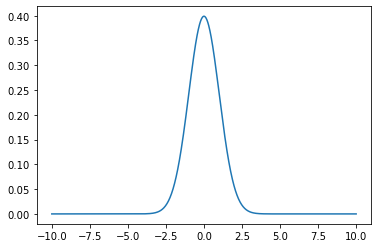

In [3]:
# Gestosc
# pdf

x = np.linspace(-10, 10, 1000)
plt.plot(x, norm01.pdf(x))
plt.show()

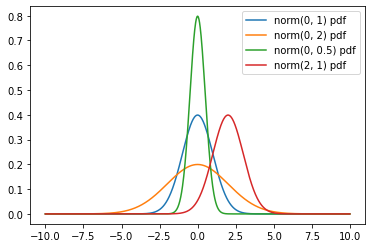

In [6]:
x = np.linspace(-10, 10, 1000)
plt.plot(x, norm01.pdf(x), label="norm(0, 1) pdf")
plt.plot(x, stats.norm(loc=0, scale=2).pdf(x), label="norm(0, 2) pdf")
plt.plot(x, stats.norm(loc=0, scale=0.5).pdf(x), label="norm(0, 0.5) pdf")
plt.plot(x, stats.norm(loc=2, scale=1).pdf(x), label="norm(2, 1) pdf")
plt.legend()
plt.show()

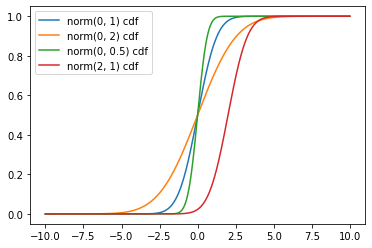

In [8]:
# Dystrybuanta

x = np.linspace(-10, 10, 1000)
plt.plot(x, norm01.cdf(x), label="norm(0, 1) cdf")
plt.plot(x, stats.norm(loc=0, scale=2).cdf(x), label="norm(0, 2) cdf")
plt.plot(x, stats.norm(loc=0, scale=0.5).cdf(x), label="norm(0, 0.5) cdf")
plt.plot(x, stats.norm(loc=2, scale=1).cdf(x), label="norm(2, 1) cdf")
plt.legend()
plt.show()

In [9]:
norm01.stats('mvsk')

(array(0.), array(1.), array(0.), array(0.))

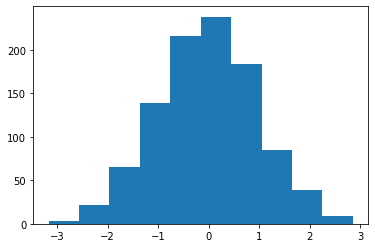

In [10]:
a = norm01.rvs(size=1000)
plt.hist(a)
plt.show()

## Standaryzacja

Dowolny rozkład normalny $\mathcal{N}(\mu, \sigma)$ można sprowadzić do rozkładu normalnego o zerowej wartości oczekiwanej i jednostkowym odchyleniu standardowym, tzn.$\mathcal{N}(0,1)$.

Jeżeli zmienna losowa $X\sim \mathcal{N}(\mu, \sigma)$, wówczas zmienna losowa
$$Y=\frac{X-\mu}{\sigma} \sim \mathcal{N}(0, 1).$$

Własność ta jest o tyle istotna, że rozkład $\mathcal{N}(0, 1)$ zwany \textbf{rozkładem normalnym standardowym}, jest stablicowany, co bardzo ułatwia dokonywanie obliczeń.

### Zadanie
Sprawdzić empirycznie następujące własności:
1. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$ to próba $Y_1, \ldots, Y_n$, gdzie $Y_i = \frac{X_i-\mu}{\sigma}$, będzie probą z rozkładu $\mathcal{N}(0,1)$.
2. Jeśli $X_1, \ldots, X_n$ będzie próbą z rozkładu normalnego $\mathcal{N}(\mu,\sigma)$, to $\overline{X}$ pochodzi z rozkładu normalnego $\mathcal{N}(\mu, \frac{\sigma}{\sqrt{n}}).$

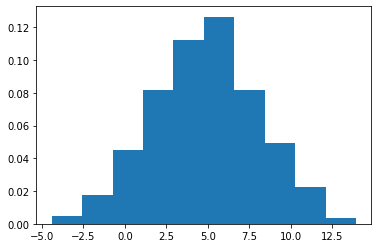

In [5]:
# Definicja
mu = 5
sigma = 3
n=1000
# rozklad normalny standardowy

norm3_5 = stats.norm(loc=mu, scale=sigma)
norm3_5

X = norm3_5.rvs(n)
plt.hist(X, density=True)
plt.show()

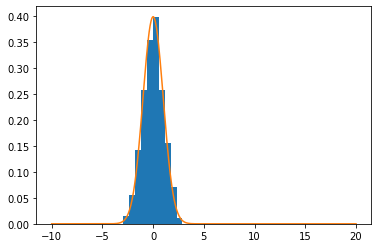

In [6]:
x = np.linspace(-10, 20, 1000)

Y = (X - np.mean(X))/np.std(X)
plt.hist(Y, density = True)
plt.plot(x, stats.norm(0, 1).pdf(x))
plt.show()

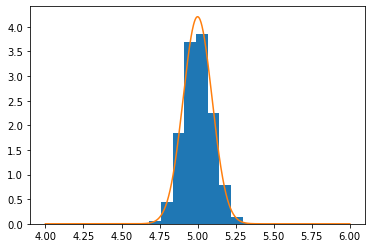

In [10]:
x = np.linspace(4, 6, 1000)

Y = [np.mean(norm3_5.rvs(n)) for i in range(10000)]
plt.hist(Y, density = True)
plt.plot(x, stats.norm(mu, sigma/np.sqrt(n)).pdf(x))
plt.show()

## Dystrybuanta


Zmienna losowa $X$ jest typu ciągłego, jeżeli istnieje **nieujemna** funkcja $f$ - zwana gęstością - taka, że dystrybuantę tej zmiennej losowej można przedstawić jako:
$$
\text{CDF}(x)=F(x) = P(X\in(-\infty, x]) = P(X\leq x) = \int_{-\infty}^x f(t)dt,
$$
dla $x\in\mathbb{R}$.

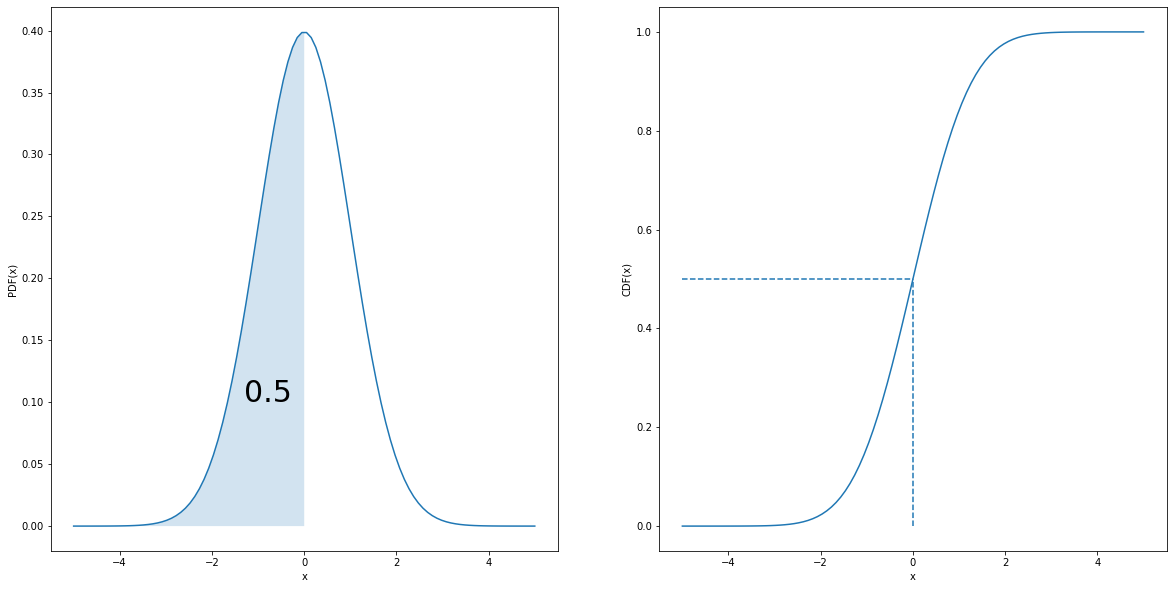

In [3]:
norm01 = stats.norm()
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

x0 = 0
a, b = -5, 5
x_value = np.linspace(a, b, 100)

x = np.linspace(a, x0)
y = norm01.pdf(x)

ax[0].plot(x_value, norm01.pdf(x_value))
ax[0].fill_between(x, y, alpha=0.2)
ax[0].text(x0-1.3, 0.1, 0.5, size=30)
ax[0].set_xlabel('x')
ax[0].set_ylabel('PDF(x)')

ax[1].plot(x_value, norm01.cdf(x_value))
plt.vlines(x0, 0, norm01.cdf(x0), linestyles='--')
plt.hlines(0.5, a, x0, linestyles='--')
ax[1].set_xlabel('x')
ax[1].set_ylabel('CDF(x)')
plt.show()

In [ ]:
# F(0) = P(X <= 0)

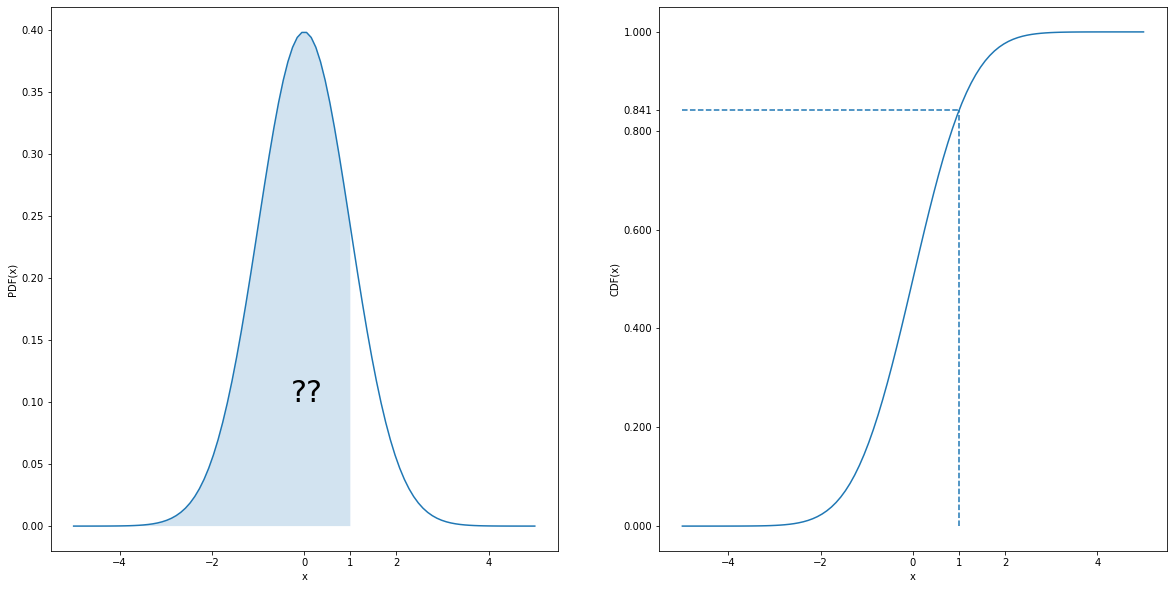

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

x0 = 1

a, b = -5, 5
x_value = np.linspace(a, b, 100)

x = np.linspace(a, x0)
y = norm01.pdf(x)

ax[0].plot(x_value, norm01.pdf(x_value))
ax[0].fill_between(x, y, alpha=0.2)
ax[0].set_xticks([-4, -2, 0, x0, 2, 4])
ax[0].text(x0-1.3, 0.1, '??', size=30)
ax[0].set_xlabel('x')
ax[0].set_ylabel('PDF(x)')

ax[1].plot(x_value, norm01.cdf(x_value))
plt.vlines(x0, 0, norm01.cdf(x0), linestyles='--')
plt.hlines(norm01.cdf(1), a, x0, linestyles='--')
ax[1].set_xticks([-4, -2, 0, x0, 2, 4])
ax[1].set_yticks([0, 0.2, 0.4, 0.6, 0.8, norm01.cdf(1), 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('CDF(x)')
plt.show()

In [24]:
norm01.cdf(1)

0.8413447460685429

## Zadania

1. Oblicz następujące prawdopodobieństwa:

    a) $P(X\leq 5)$, gdy $X\sim\mathcal{N}(-1, 2)$,
    
    b) $P(X>-2)$, gdy $X\sim\mathcal{N}(1, 5)$,
    
    c) $P(X<0)$, gdy $X\sim\mathcal{N}(5, 0.2)$.

2. W pewnej dużej korporacji średnia miesięczna pensja pracowników średniego szczebla wynosi 10000 zł z odchyleniem standardowym 500 zł. Zakładamy, że rozkład zarobków pracowników jest w przybliżeniu rozkładem normalnym. Wyznacz prawdopodobieństwo, że losowo wybrany pracownik średniego szczebla zarabia powyżej 11000 zł.

3. Stwierdzono, że iloraz inteligencji IQ ma rozkład normalny o wartości oczekiwanej 100 i odchyleniu standardowym 15. Oblicz prawdopodobieństwo, że iloraz inteligencji losowo wybranej osoby jest nie większy niż 90.

4. Zgodnie z planem, czas lotu z Warszawy do Lizbony na rozkład normalny o wartości oczekiwanej 4h i 20 minut i odchyleniem standardowym 10 min. Jakie jest prawdopodobieństwo, że pokonanie samolotem tej trasy zajmie dłużej niż 4h?

5. Waga pewnej grupy osób opisana jest rozkładem normalnym o wartości średniej 75 kg i odchyleniu standardowym 5 kg. Jakie jest prawdopodobieństwo, że losowo wybrana osoba waży mniej niż 72 kg?


In [85]:
# 1.

print(f'P(X <= 5) = {stats.norm(loc = -1, scale = 2).cdf(5)}')
print(f'P(X > -2) = {1 - stats.norm(loc = 1, scale = 5).cdf(-2)}')
print(f'P(X < 0) = {stats.norm(loc = 5, scale = 0.2).cdf(0)}')

P(X <= 5) = 0.9986501019683699
P(X > -2) = 0.7257468822499265
P(X < 0) = 3.056696706382561e-138


In [86]:
# 2.

# X - średnie zarobki losowo wybranego pracownika średniego szczebla
# X ~ N(mu = 10 000; sigma = 500)
# P(X > 11 000)= 1 - F(11000)

p2 = 1 - stats.norm.cdf(11000, loc=10000, scale=500)
print('P(X > 11000) = {}'.format(p2))

P(X > 11000) = 0.02275013194817921


In [88]:
#3.

print(f'P(X < 90) = {stats.norm(loc = 100, scale = 15).cdf(90)}')

P(X < 90) = 0.2524925375469229


In [91]:
#4.

print(f'P(X > 4h) = {1-stats.norm(loc = 4*60+20, scale = 10).cdf(4*60)}')

P(X > 4h) = 0.9772498680518208


In [93]:
#5.

print(f'P(X < 72) = {stats.norm(loc = 75, scale = 5).cdf(72)}')

P(X < 72) = 0.2742531177500736


## Kwantyle

Dla każdej dystrybuanty $F$, określa się **kwantyl** rzędu $p$, gdzie $0< p <1$, jako:
$$
q_p = \min\{x: F(x)\geq p\}.
$$

Jeżeli dystrybuanta jest funkcją odwracalną, kwantyl możemy przedstawić jako:
$$
    q_p = F^{-1}(p).
$$

Wtedy kwantyl ma prostą interpretację w języku zmiennych losowych:
$$
P(X \leq q_p) = p \qquad \text{oraz} \qquad P(X > q_p) = 1-P(X\leq q_p) = 1-p.
$$

In [12]:
# ppf(q, loc=0, scale=1)
# Percent point function (inverse of cdf — percentiles).

p = 0.5
q = norm01.ppf(p)
q

0.0

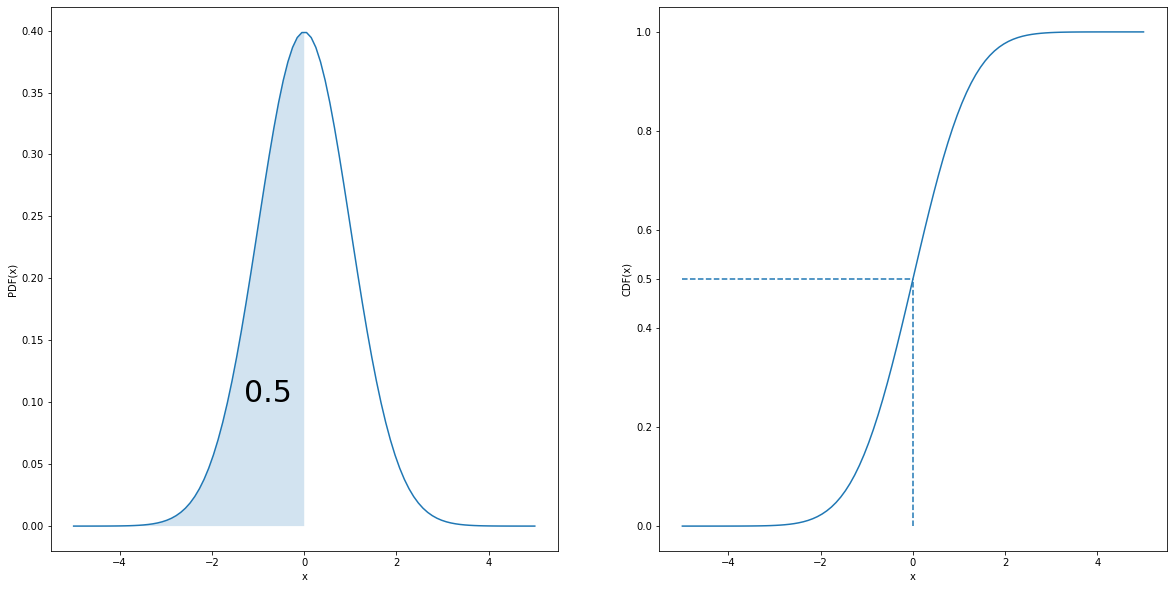

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

x0 = 0.0
a, b = -5, 5
x_value = np.linspace(a, b, 100)

x = np.linspace(a, x0)
y = norm01.pdf(x)

ax[0].plot(x_value, norm01.pdf(x_value))
ax[0].fill_between(x, y, alpha=0.2)
ax[0].text(x0-1.3, 0.1, p, size=30)
ax[0].set_xlabel('x')
ax[0].set_ylabel('PDF(x)')

ax[1].plot(x_value, norm01.cdf(x_value))
plt.vlines(x0, 0, norm01.cdf(x0), linestyles='--')
plt.hlines(p, a, x0, linestyles='--')
ax[1].set_yticks([0, 0.2, 0.4, 0.5, 0.6, 0.8, 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('CDF(x)')
plt.show()

In [13]:
p = 0.8
q = norm01.ppf(p) # kwantyl rzędu p
q

0.8416212335729143

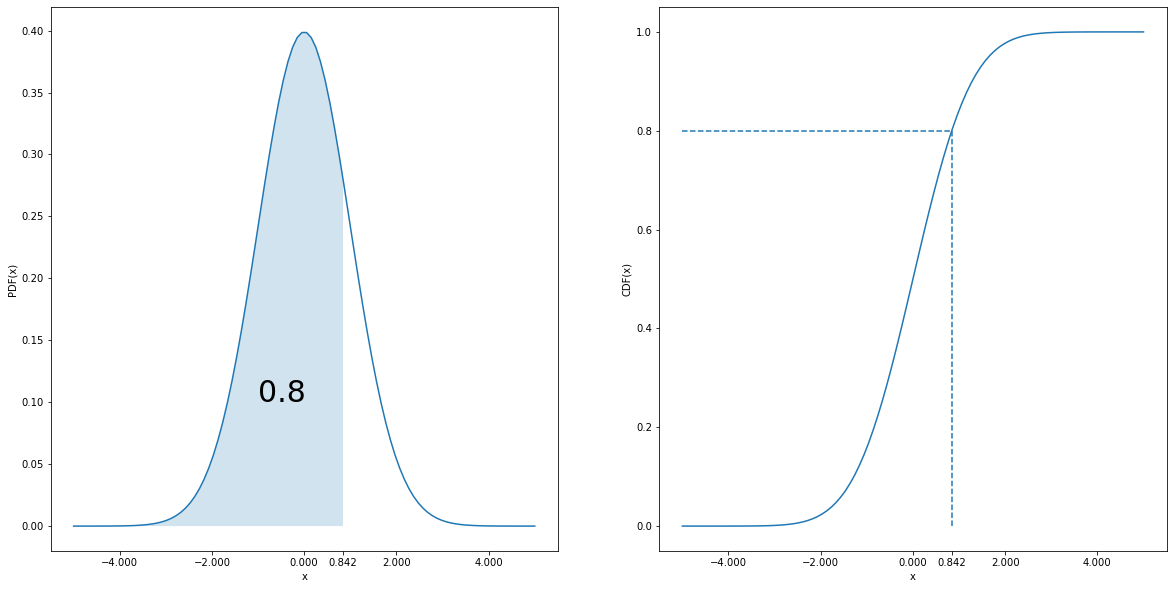

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

x0 = 0.0
a, b = -5, 5
x_value = np.linspace(a, b, 100)

x = np.linspace(a, q)
y = norm01.pdf(x)

ax[0].plot(x_value, norm01.pdf(x_value))
ax[0].fill_between(x, y, alpha=0.2)
ax[0].text(x0-1, 0.1, p, size=30)
ax[0].set_xticks([-4, -2, 0, q, 2, 4])
ax[0].set_xlabel('x')
ax[0].set_ylabel('PDF(x)')

ax[1].plot(x_value, norm01.cdf(x_value))
plt.vlines(q, 0, p, linestyles='--')
plt.hlines(p, a, q, linestyles='--')
ax[1].set_xticks([-4, -2, 0, q, 2, 4])
ax[1].set_xlabel('x')
ax[1].set_ylabel('CDF(x)')
plt.show()

In [16]:
# P(X <= x) = 0.8
# => znajdz x???
# => kwantyle
# => ppf

norm01.ppf(0.8)

0.8416212335729143

-0.6744897501960817


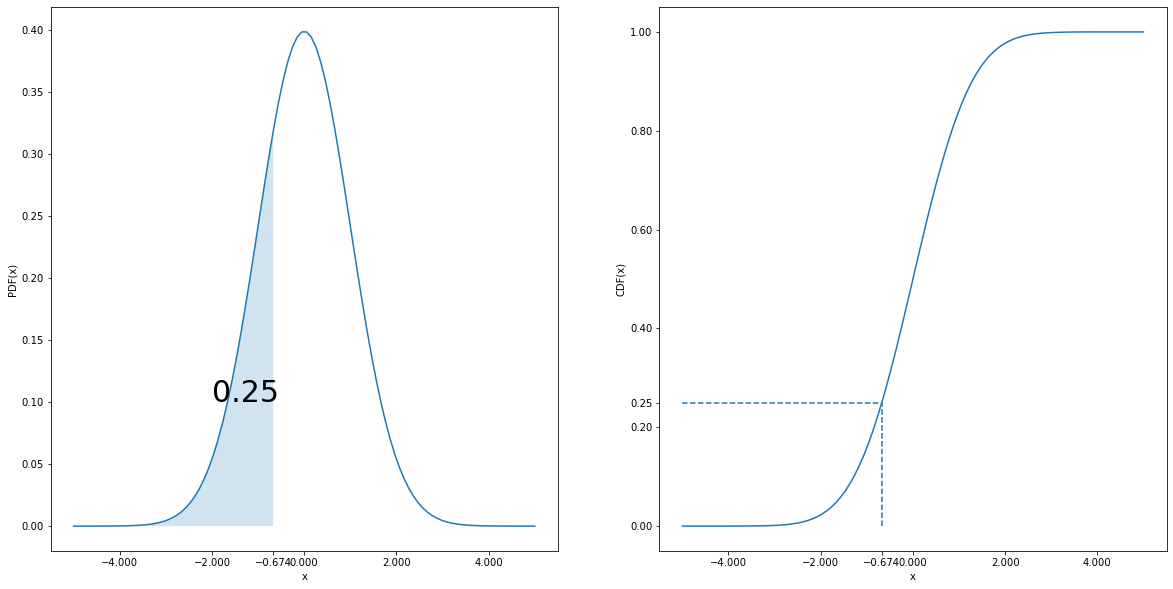

In [25]:
p = 0.25
q = norm01.ppf(p)
print(q)

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

x0 = 0.0
a, b = -5, 5
x_value = np.linspace(a, b, 100)

x = np.linspace(a, q)
y = norm01.pdf(x)

ax[0].plot(x_value, norm01.pdf(x_value))
ax[0].fill_between(x, y, alpha=0.2)
ax[0].text(x0-2, 0.1, p, size=30)
ax[0].set_xticks([-4, -2, q, 0, 2, 4])
ax[0].set_xlabel('x')
ax[0].set_ylabel('PDF(x)')

ax[1].plot(x_value, norm01.cdf(x_value))
plt.vlines(q, 0, p, linestyles='--')
plt.hlines(p, a, q, linestyles='--')
ax[1].set_xticks([-4, -2, q, 0, 2, 4])
ax[1].set_yticks([0, .2, p, .4, .6, .8, 1])
ax[1].set_xlabel('x')
ax[1].set_ylabel('CDF(x)')
plt.show()

## Reguła 3-sigm

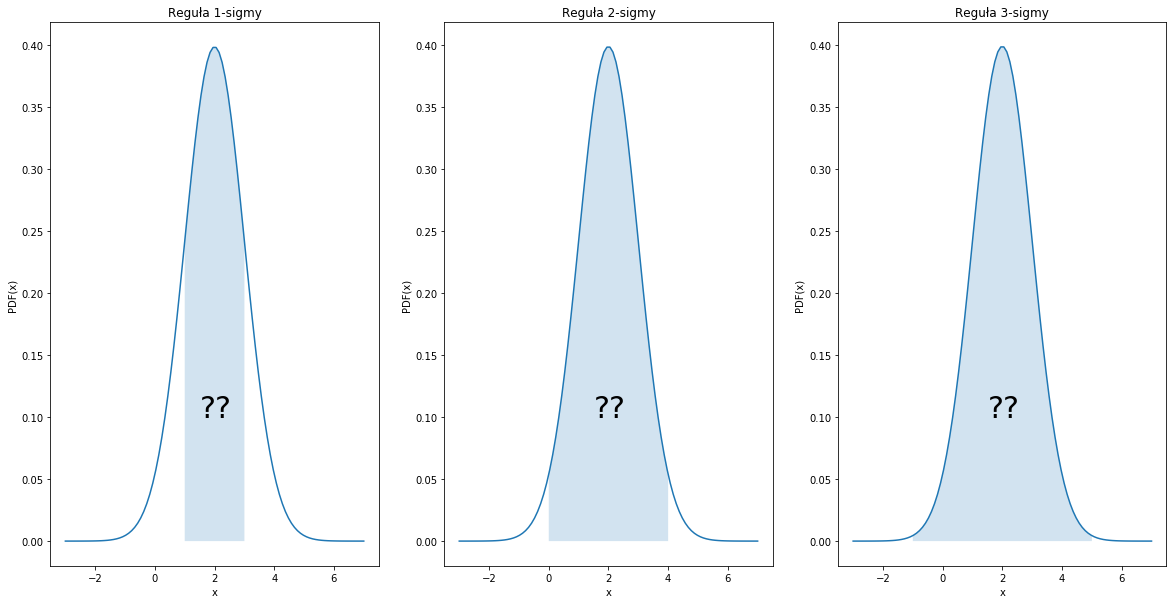

In [71]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

mu, sigma = 2, 1
norm = stats.norm(loc=mu, scale=sigma)
a, b = mu - 5, mu + 5
x_value = np.linspace(a, b, 100)

for i in np.arange(3):
    x = np.linspace(mu - (i + 1) * sigma, mu + (i + 1) * sigma)
    y = norm.pdf(x)

    ax[i].plot(x_value, norm.pdf(x_value))
    ax[i].fill_between(x, y, alpha=0.2)
    ax[i].text(mu-0.5, 0.1, '??', size=30)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('PDF(x)')
    ax[i].set_title('Reguła {}-sigmy'.format(i+1))

plt.show()

### Zadanie
Oblicz następujące prawdopodobieństwa

$P(X\in[\mu-\sigma, \mu+\sigma])$

$P(X\in[\mu-2\sigma, \mu+2\sigma])$

$P(X\in[\mu-3\sigma, \mu+3\sigma])$

dla następujących rozkładów normalnych

a) $\mathcal{N}(0, 1)$,

b) $\mathcal{N}(-2, 2)$,

c) $\mathcal{N}(4, 0.5)$.

**Wskazówka**: W przypadku ciągłym prawdziwy jest wzór:
$$P(X\in[a, b]) = F(b)-F(a).$$

In [18]:
normb = stats.norm(loc=-2, scale=2)
normc = stats.norm(loc=4, scale=0.5)

print('1-sigma')
print('--------------------')
print(norm01.cdf(1) - norm01.cdf(-1))
print(normb.cdf(-2+2) - normb.cdf(-2-2))
print(normc.cdf(4+0.5) - normc.cdf(4-0.5))
print('2-sigmy')
print('--------------------')
print(norm01.cdf(2) - norm01.cdf(-2))
print(normb.cdf(-2+2*2) - normb.cdf(-2-2*2))
print(normc.cdf(4+2*0.5) - normc.cdf(4-2*0.5))
print('3-sigmy')
print('--------------------')
print(norm01.cdf(3) - norm01.cdf(-3))
print(normb.cdf(-2+3*2) - normb.cdf(-2-3*2))
print(normc.cdf(4+3*0.5) - normc.cdf(4-3*0.5))

sig = [norm01.cdf(1) - norm01.cdf(-1), norm01.cdf(2) - norm01.cdf(-2), norm01.cdf(3) - norm01.cdf(-3)]

1-sigma
--------------------
0.6826894921370859
0.6826894921370859
0.6826894921370859
2-sigmy
--------------------
0.9544997361036416
0.9544997361036416
0.9544997361036416
3-sigmy
--------------------
0.9973002039367398
0.9973002039367398
0.9973002039367398


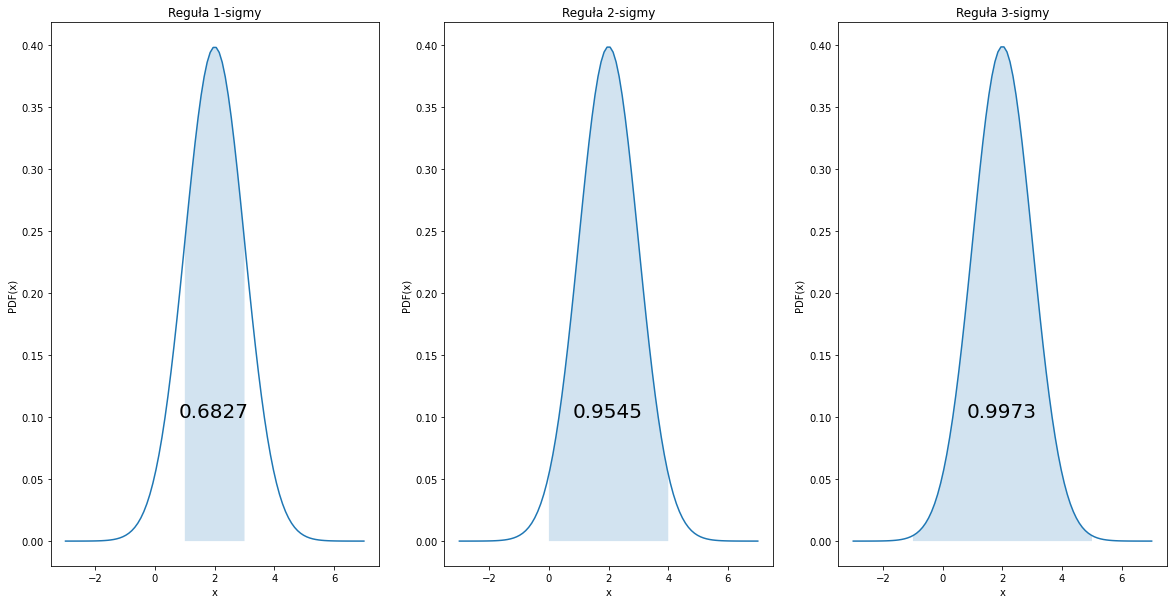

In [19]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

mu, sigma = 2, 1
norm = stats.norm(loc=mu, scale=sigma)
a, b = mu - 5, mu + 5
x_value = np.linspace(a, b, 100)

for i in np.arange(3):
    x = np.linspace(mu - (i + 1) * sigma, mu + (i + 1) * sigma)
    y = norm.pdf(x)

    ax[i].plot(x_value, norm.pdf(x_value))
    ax[i].fill_between(x, y, alpha=0.2)
    ax[i].text(mu-1.2, 0.1, np.round(sig[i], 4), size=20)
    ax[i].set_xlabel('x')
    ax[i].set_ylabel('PDF(x)')
    ax[i].set_title('Reguła {}-sigmy'.format(i+1))

plt.show()